# Total Wet-day Rainfall

Calculates annually the total rainfall on days that are considered wet. Wet Days are days where precipitation is greater than 1mm. Also, calculates the total amount of wet days for each year

## Requirements: 
Run downloadGHCNd.ipynb located /1_atmosphere/downloadGHCnd.ipynb to download the required GHCNd data


In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
# from datetime import date

In [2]:
import pickle 

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [5]:
precip = pd.read_pickle("../../GHCNd/pkl/PRECIP_KOROR_PSW00040309.pkl")
precip_table = {}
#This file also had the same issue with the csv not including proper decimal values
precip["PRCP"] = precip["PRCP"]/10
precip["WET_DAY"]= precip["PRCP"] >= 1.0
precip["DRY_DAY"]= precip["PRCP"] < 1.0
precip['DATE'] = pd.to_datetime(precip['DATE'], format='%Y-%m-%d')
precip["YEAR"] = precip['DATE'].dt.year

In [6]:
precip

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,WET_DAY,DRY_DAY,YEAR
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,True,1951
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",0.8,0.0,0.0,False,True,1951
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",3.8,0.0,0.0,True,False,1951
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",18.3,0.0,0.0,True,False,1951
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,True,1951
...,...,...,...,...,...,...,...,...,...,...,...,...
25987,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",1.0,NaN,NaN,True,False,2024
25988,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",16.0,NaN,NaN,True,False,2024
25989,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,True,2024
25990,PSW00040309,2024-01-06,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,True,2024


In [7]:
precip[precip['WET_DAY'] == True]

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,WET_DAY,DRY_DAY,YEAR
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",3.8,0.0,0.0,True,False,1951
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",18.3,0.0,0.0,True,False,1951
5,PSW00040309,1951-07-06,7.33674,134.47686,27.4,"KOROR, PW PS",6.4,0.0,0.0,True,False,1951
6,PSW00040309,1951-07-07,7.33674,134.47686,27.4,"KOROR, PW PS",18.5,0.0,0.0,True,False,1951
8,PSW00040309,1951-07-09,7.33674,134.47686,27.4,"KOROR, PW PS",3.3,0.0,0.0,True,False,1951
...,...,...,...,...,...,...,...,...,...,...,...,...
25985,PSW00040309,2023-12-31,7.33674,134.47686,27.4,"KOROR, PW PS",1.8,NaN,NaN,True,False,2023
25986,PSW00040309,2024-01-02,7.33674,134.47686,27.4,"KOROR, PW PS",48.3,NaN,NaN,True,False,2024
25987,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",1.0,NaN,NaN,True,False,2024
25988,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",16.0,NaN,NaN,True,False,2024


In [8]:
rainfall_wet = precip[precip['WET_DAY'] == True].groupby('YEAR')['PRCP'].sum()

In [9]:
rainfall_wet

YEAR
1951    1771.6
1952    4100.7
1953    4024.7
1954    3733.4
1955    3368.7
         ...  
2020    3675.0
2021    4467.8
2022    4371.7
2023    4010.4
2024      71.9
Name: PRCP, Length: 74, dtype: float64

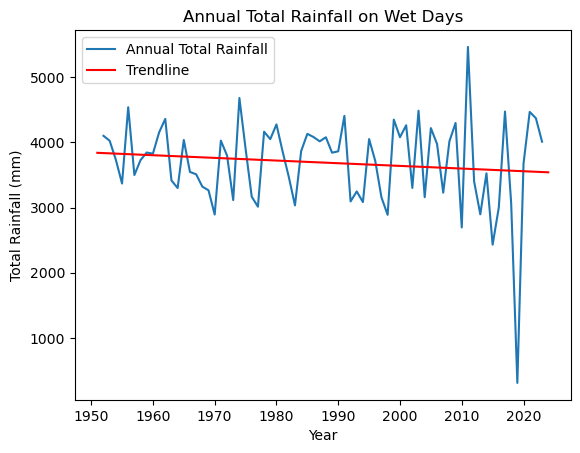

In [10]:
plt.plot(rainfall_wet[1:-1].index,rainfall_wet[1:-1].values,label = "Annual Total Rainfall")
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title("Annual Total Rainfall on Wet Days")

z = np.polyfit(rainfall_wet[1:-1].index, rainfall_wet[1:-1].values, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial function for the trendline
#Save decade trend
precip_table["Annual total rainfall on wet days"] = z[0]*10
plt.plot(rainfall_wet.index, p(rainfall_wet.index), label='Trendline', color="red")
plt.savefig('historical-total-rainfall-on-wet-days.png', format='png',dpi=300,facecolor='white')
plt.legend()
plt.show()

In [11]:
wet_day_count = precip[precip['WET_DAY'] == True].groupby('YEAR')['WET_DAY'].sum()

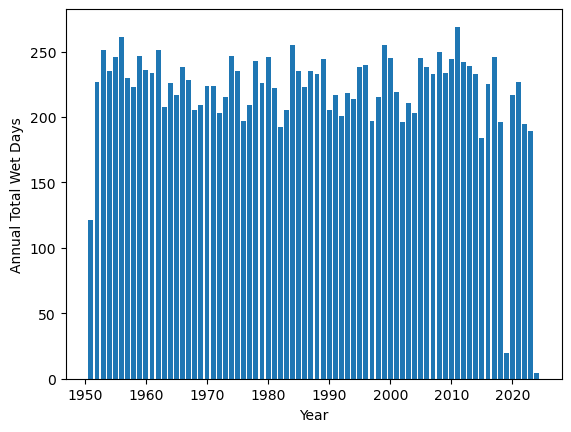

In [12]:
plt.bar(wet_day_count.index,wet_day_count.values, label = "a")
plt.xlabel('Year')
plt.ylabel('Annual Total Wet Days')
plt.savefig('historical-annual-total-wet-days.png', format='png',dpi=300,facecolor='white')

plt.show()